In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model_revised
from models.energy import energy_baseline

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/263 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 263/263 [00:31<00:00,  8.23it/s]


In [3]:
energy

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-01-07 10:00:00,52.73325,6
2024-01-07 11:00:00,55.03475,6
2024-01-07 12:00:00,55.82900,6


In [4]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
quantile_model = {
    'name': 'Quantile Regression',
    'function': energy_quantile_regression.energy_quantile_regression
}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5270
Model:                       QuantReg   Bandwidth:                      0.7860
Method:                 Least Squares   Sparsity:                        11.61
Date:                Sun, 07 Jan 2024   No. Observations:                27256
Time:                        15:24:18   Df Residuals:                    27220
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9287      0.206    290.296      0.000      59.524      60.333
weekday       -1.8722      0.018   -106.527      0.000      -1.907      -1.838
month_2       -0.1468      0.167     -0.880      0.379      -0.474       0.180
month_3       -3.6168      0.162    -22.296      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5273
Model:                       QuantReg   Bandwidth:                      0.7855
Method:                 Least Squares   Sparsity:                        11.61
Date:                Sun, 07 Jan 2024   No. Observations:                27280
Time:                        15:24:34   Df Residuals:                    27244
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9151      0.206    290.329      0.000      59.511      60.320
weekday       -1.8724      0.018   -106.593      0.000      -1.907      -1.838
month_2       -0.0957      0.166     -0.575      0.565      -0.422       0.230
month_3       -3.6072      0.162    -22.238      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5277
Model:                       QuantReg   Bandwidth:                      0.7848
Method:                 Least Squares   Sparsity:                        11.61
Date:                Sun, 07 Jan 2024   No. Observations:                27328
Time:                        15:25:02   Df Residuals:                    27292
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9234      0.206    290.601      0.000      59.519      60.328
weekday       -1.8727      0.018   -106.642      0.000      -1.907      -1.838
month_2        0.0002      0.165      0.001      0.999      -0.323       0.324
month_3       -3.6076      0.162    -22.246      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5277
Model:                       QuantReg   Bandwidth:                      0.7846
Method:                 Least Squares   Sparsity:                        11.62
Date:                Sun, 07 Jan 2024   No. Observations:                27352
Time:                        15:25:19   Df Residuals:                    27316
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9070      0.206    290.452      0.000      59.503      60.311
weekday       -1.8697      0.018   -106.435      0.000      -1.904      -1.835
month_2        0.0291      0.165      0.177      0.860      -0.294       0.352
month_3       -3.6164      0.162    -22.288      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5277
Model:                       QuantReg   Bandwidth:                      0.7848
Method:                 Least Squares   Sparsity:                        11.62
Date:                Sun, 07 Jan 2024   No. Observations:                27376
Time:                        15:25:33   Df Residuals:                    27340
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9195      0.206    290.466      0.000      59.515      60.324
weekday       -1.8720      0.018   -106.564      0.000      -1.906      -1.838
month_2        0.0245      0.164      0.149      0.881      -0.297       0.346
month_3       -3.6085      0.162    -22.229      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5276
Model:                       QuantReg   Bandwidth:                      0.7845
Method:                 Least Squares   Sparsity:                        11.62
Date:                Sun, 07 Jan 2024   No. Observations:                27400
Time:                        15:25:41   Df Residuals:                    27364
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9185      0.206    290.501      0.000      59.514      60.323
weekday       -1.8728      0.018   -106.672      0.000      -1.907      -1.838
month_2        0.0220      0.164      0.134      0.893      -0.299       0.343
month_3       -3.6168      0.162    -22.273      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5279
Model:                       QuantReg   Bandwidth:                      0.7838
Method:                 Least Squares   Sparsity:                        11.63
Date:                Sun, 07 Jan 2024   No. Observations:                27424
Time:                        15:25:48   Df Residuals:                    27388
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9007      0.206    290.413      0.000      59.496      60.305
weekday       -1.8692      0.018   -106.536      0.000      -1.904      -1.835
month_2        0.0090      0.163      0.055      0.956      -0.311       0.329
month_3       -3.6170      0.162    -22.266      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5283
Model:                       QuantReg   Bandwidth:                      0.7830
Method:                 Least Squares   Sparsity:                        11.61
Date:                Sun, 07 Jan 2024   No. Observations:                27448
Time:                        15:25:56   Df Residuals:                    27412
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9004      0.206    290.941      0.000      59.497      60.304
weekday       -1.8702      0.018   -106.802      0.000      -1.905      -1.836
month_2        0.0202      0.163      0.125      0.901      -0.298       0.339
month_3       -3.6109      0.162    -22.263      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5286
Model:                       QuantReg   Bandwidth:                      0.7820
Method:                 Least Squares   Sparsity:                        11.60
Date:                Sun, 07 Jan 2024   No. Observations:                27472
Time:                        15:26:08   Df Residuals:                    27436
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8912      0.206    291.188      0.000      59.488      60.294
weekday       -1.8694      0.017   -106.844      0.000      -1.904      -1.835
month_2        0.0462      0.162      0.286      0.775      -0.271       0.364
month_3       -3.6196      0.162    -22.333      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5289
Model:                       QuantReg   Bandwidth:                      0.7821
Method:                 Least Squares   Sparsity:                        11.58
Date:                Sun, 07 Jan 2024   No. Observations:                27496
Time:                        15:26:19   Df Residuals:                    27460
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8858      0.205    291.691      0.000      59.483      60.288
weekday       -1.8683      0.017   -106.945      0.000      -1.902      -1.834
month_2        0.0867      0.161      0.538      0.590      -0.229       0.403
month_3       -3.6192      0.162    -22.365      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5289
Model:                       QuantReg   Bandwidth:                      0.7818
Method:                 Least Squares   Sparsity:                        11.60
Date:                Sun, 07 Jan 2024   No. Observations:                27520
Time:                        15:26:27   Df Residuals:                    27484
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8785      0.205    291.410      0.000      59.476      60.281
weekday       -1.8644      0.017   -106.617      0.000      -1.899      -1.830
month_2        0.1601      0.161      0.995      0.320      -0.155       0.475
month_3       -3.6352      0.162    -22.438      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5288
Model:                       QuantReg   Bandwidth:                      0.7816
Method:                 Least Squares   Sparsity:                        11.59
Date:                Sun, 07 Jan 2024   No. Observations:                27544
Time:                        15:26:40   Df Residuals:                    27508
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8827      0.205    291.636      0.000      59.480      60.285
weekday       -1.8651      0.017   -106.749      0.000      -1.899      -1.831
month_2        0.1440      0.160      0.898      0.369      -0.170       0.458
month_3       -3.6316      0.162    -22.425      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5285
Model:                       QuantReg   Bandwidth:                      0.7820
Method:                 Least Squares   Sparsity:                        11.60
Date:                Sun, 07 Jan 2024   No. Observations:                27568
Time:                        15:26:50   Df Residuals:                    27532
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8868      0.205    291.629      0.000      59.484      60.289
weekday       -1.8671      0.017   -106.910      0.000      -1.901      -1.833
month_2        0.1249      0.160      0.781      0.435      -0.189       0.439
month_3       -3.6276      0.162    -22.388      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_baseline.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_quantile_regression.py:32: SettingWithCopyWarning: 
A

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5287
Model:                       QuantReg   Bandwidth:                      0.7808
Method:                 Least Squares   Sparsity:                        11.60
Date:                Sun, 07 Jan 2024   No. Observations:                27592
Time:                        15:27:01   Df Residuals:                    27556
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8724      0.205    291.535      0.000      59.470      60.275
weekday       -1.8647      0.017   -106.828      0.000      -1.899      -1.830
month_2        0.0627      0.160      0.393      0.694      -0.250       0.376
month_3       -3.6337      0.162    -22.416      0.0

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

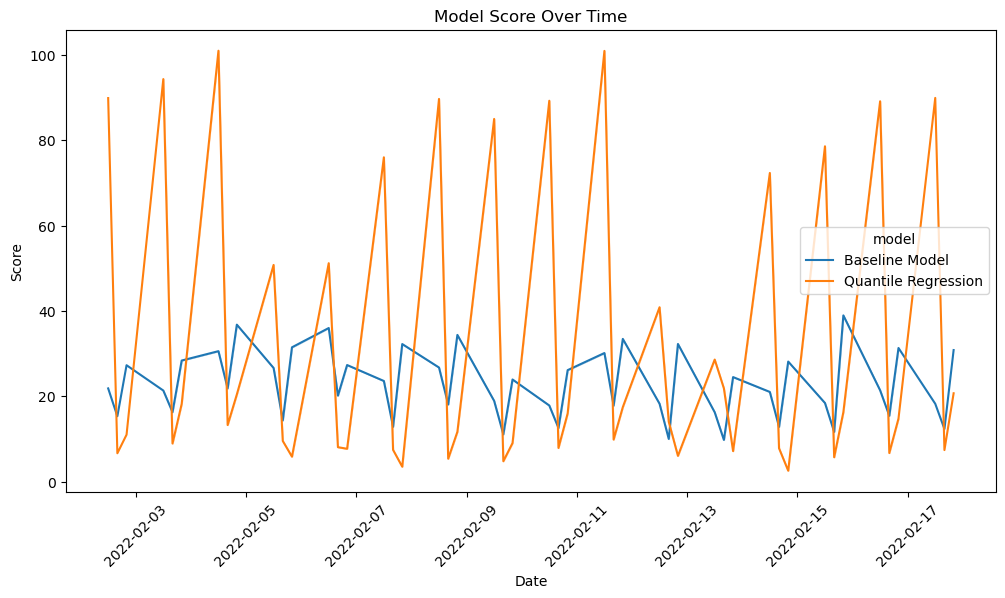

In [5]:
start_date = '2022-02-01'
end_date = '2022-02-15'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model_revised.evaluate(baseline_model, quantile_model, energy, start_date, end_date, horizon_format="hours")

In [6]:
evaluation_model1.score.sum()

2047.9918625

In [7]:
evaluation_model2.score.sum()

2896.6002245235168